In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
china_gdp = 'https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/china_gdp.csv'
df = pd.read_csv(china_gdp)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [3]:
df.shape

(55, 2)

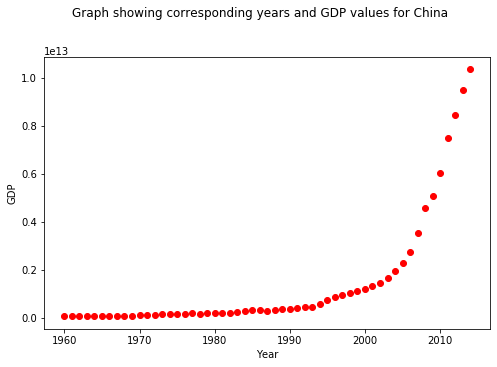

In [4]:
plt.figure(figsize=(8,5))
X_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(X_data, y_data, 'ro')
plt.suptitle('Graph showing corresponding years and GDP values for China', y=1.02)
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [5]:
def sigmoid(X, Beta_1, Beta_2):
    """ This method performs the sigmoid function on param X and 
    Returns the outcome as a varible called y"""
    y = 1 / (1 + np.exp(-Beta_1*(X-Beta_2)))
    return y

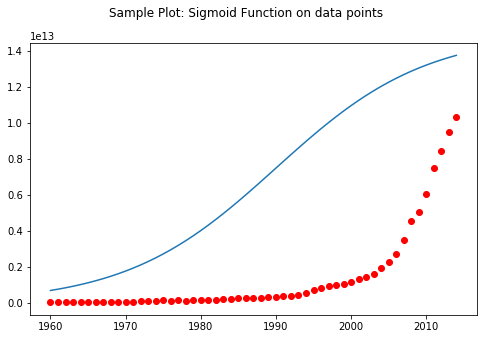

In [6]:
beta_1 = 0.10
beta_2 = 1990.0
# logistic_function
y_pred = sigmoid(X_data, beta_1, beta_2)
# Plot initial predictions against data points.
plt.figure(figsize=(8,5))
plt.suptitle('Sample Plot: Sigmoid Function on data points')
plt.plot(X_data, y_pred*15000000000000.0)
plt.plot(X_data, y_data, 'ro')
plt.show()

In [7]:
xdata = X_data / max(X_data)
ydata = y_data / max(y_data)

## Finding the best parameters

In [8]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# popt are our new optimized parameters
# pcov represents the covariance
print('beta_1 = %f, beta_2 = %f' % (popt[0],popt[1]))

beta_1 = 690.451711, beta_2 = 0.997207


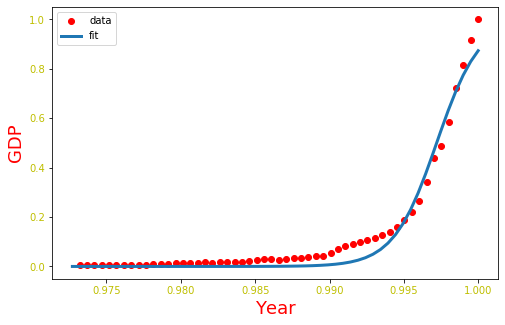

In [9]:
x = np.linspace(1960, 2015, 55)
# Normalize x
x = x / max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, popt[0], popt[1])
# Plotting the original data points
plt.plot(xdata, ydata, 'ro', label='data')
# Plotting the fitted prediction line
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP', color='r', fontsize=18)
plt.xlabel('Year', color='r', fontsize=18)
plt.xticks(color = 'y')
plt.yticks(color = 'y')
plt.show()

In [10]:
msk = np.random.rand(len(df)) < 0.8 
train_x = xdata[msk] 
test_x = xdata[~msk] 
train_y = ydata[msk]
test_y = ydata[~msk]

In [11]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)
# Remember popt saves the ideal parameters from curve_fit method
# While pcov stores the covariance
print('Ideal params are: ', popt)

Ideal params are:  [698.08657056   0.99724652]


In [12]:
y_hat = sigmoid(test_x, *popt)
# *popt means unpack popt into popt[0] and popt[1]

In [13]:
mean_abs_error = np.mean(np.absolute(y_hat - test_y))
mean_squ_error = np.mean(np.absolute((y_hat - test_y) **2))
print("Mean absolute error: %.2f" % mean_abs_error)
print("Residual sum of squares (MSE): %.2f" % mean_squ_error)
# Next let's check the R2 score, The coefficient of determination
from sklearn.metrics import r2_score
r_score = r2_score(y_hat, test_y)
print("R2-score: %.2f" % r_score)

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.96
